In [22]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [49]:
train_df = pd.read_json('../input/train.json')
test_df = pd.read_json('../input/test.json')

In [37]:
train_df[['price']].describe()

,price
count,4.935200e+04
mean,3.830174e+03
std,2.206687e+04
min,4.300000e+01
25%,2.500000e+03
50%,3.150000e+03
75%,4.100000e+03
max,4.490000e+06


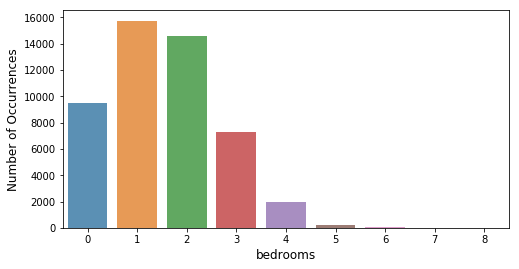

In [28]:
int_level = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


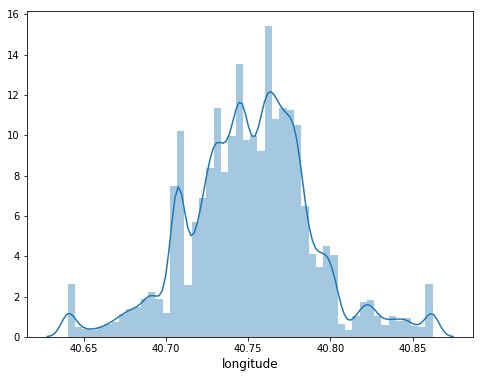

In [51]:
ulimit = np.percentile(train_df.latitude.values, 99)
train_df['longitude'].ix[train_df['longitude']>ulimit] = ulimit

ulimit = np.percentile(train_df.latitude.values, 1)
train_df['longitude'].ix[train_df['longitude']<ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=True)
plt.xlabel('longitude', fontsize=12)
plt.show()

In [52]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

west, south, east, north = -74.02, 40.64, -73.85, 40.86

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(train_df['longitude'].values, train_df['latitude'].values)
m.hexbin(x, y, gridsize=200,
         bins='log', cmap=cm.YlOrRd_r);

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [54]:
train_df.manager_id.value_counts().nlargest(10)

e6472c7237327dd3903b3d6f6a94515a    2533
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     402
cb87dadbca78fad02b388dc9e8f25a5b     373
9df32cb8dda19d3222d66e69e258616b     330
b7de4cb395920136663132057fa89d84     320
2aa9bfa5f67ed9997ea341dee8a3a271     316
ad3d8ddc52c7e0859b5c6c7f7949c3bd     305
c9c33695ee2a2f818e9f1d8f7d1c4b39     299
Name: manager_id, dtype: int64

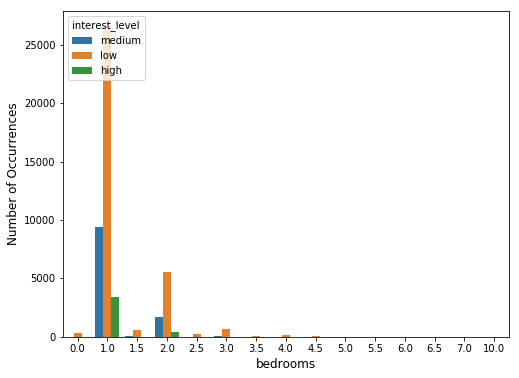

In [58]:
plt.figure(figsize=(8,6))
sns.countplot(x='bathrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


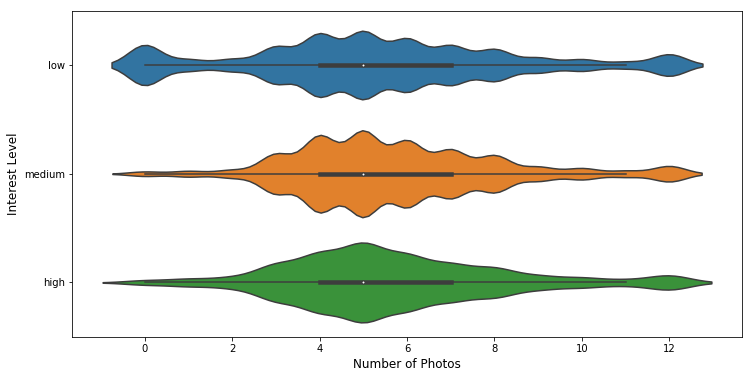

In [57]:
train_df["num_photos"] = train_df["photos"].apply(len)

train_df['num_photos'].ix[train_df['num_photos']>12] = 12
plt.figure(figsize=(12,6))
sns.violinplot(x="num_photos", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

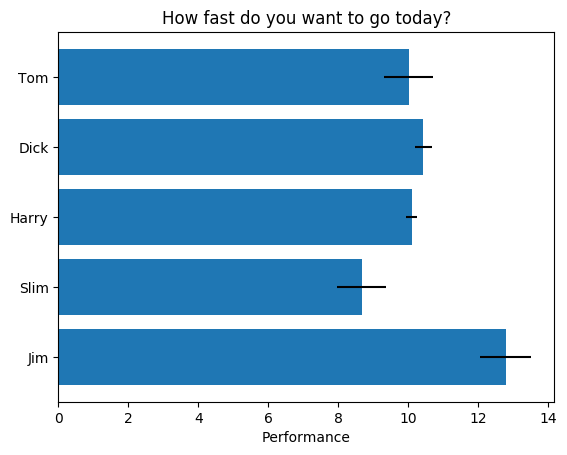

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [60]:
import seaborn as sns
sns.set(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

URLError: <urlopen error [Errno 111] Connection refused>

In [61]:
test_df.shape

(74659, 14)